432
candi 92
46 0 353 303
size 42166
154 17 145 171
size 15396
111 150 195 230
size 10407
419 187 92 95
size 2211
305 216 154 135
size 4300
134 348 75 77
size 3876
148 424 93 87
size 3839
365 345 129 108
size 2339
134 348 75 77
size 3972
134 348 75 77
size 4044
134 348 75 77
size 4146
154 17 146 171
size 15712
134 348 75 77
size 4253
134 348 75 77
size 4549
74 150 232 230
size 11434
151 14 155 174
size 17464
401 359 106 125
size 4159
134 348 75 77
size 4583
134 348 75 77
size 4649
213 336 188 175
size 5951
213 336 188 175
size 5986
46 0 353 303
size 42232
0 335 196 176
size 11413
151 14 155 174
size 17633
151 14 155 174
size 17931
151 14 155 174
size 17955
151 14 155 174
size 18355
134 348 75 77
size 4685
134 348 75 77
size 4706
213 216 246 295
size 10286
365 345 129 108
size 2363
419 187 92 95
size 2259
74 150 232 230
size 12502
0 335 196 176
size 11562
46 0 353 303
size 42308
46 0 353 303
size 42380
0 209 356 302
size 63241
46 0 353 303
size 42494
213 216 246 295
size 10323
213 216 2

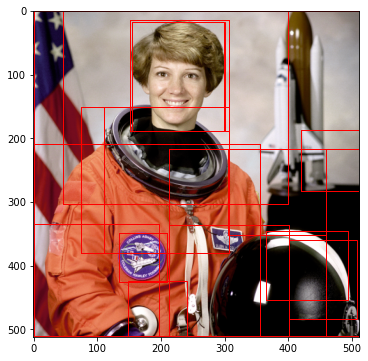

In [17]:
# -*- coding: utf-8 -*-
from __future__ import (
    division,
    print_function,
)

import skimage.data
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import selectivesearch
import numpy as np


def main():

    # 加载图片数据
    img = skimage.data.astronaut() 

    '''
    执行selective search，regions格式如下
    [
                {
                    'rect': (left, top, width, height),
                    'labels': [...],
                    'size': component_size
                },
                ...
    ]
    '''
    img_lbl, regions = selectivesearch.selective_search(
        img, scale=500, min_size=20)

    #计算利用Selective Search算法得到了多少个候选区域
    print(len(regions))    #570
    #创建一个集合 元素不会重复，每一个元素都是一个list(左上角x，左上角y,宽,高)，表示一个候选区域的边框
    candidates = list()
    for r in regions:
        #排除重复的候选区
        if r['rect'] in candidates:
            continue
        #排除小于 2000 pixels的候选区域(并不是bounding box中的区域大小)  
        if r['size'] < 2000:
            continue
        #排除扭曲的候选区域边框  即只保留近似正方形的
        x, y, w, h = r['rect']
        if w / h > 1.2 or h / w > 1.2:
            continue
        candidates.append(r)
    print("candi", len(candidates))
    #在原始图像上绘制候选区域边框
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
    ax.imshow(img)
    for r in candidates:
        x, y, w, h = r["rect"]
        print(x, y, w, h)
        print("size", r["size"])
        rect = mpatches.Rectangle(
            (x, y), w, h, fill=False, edgecolor='red', linewidth=1)
        ax.add_patch(rect)

    plt.show()
    

if __name__ == "__main__":
    main()

In [2]:
help(selectivesearch.selective_search)

Help on function selective_search in module selectivesearch.selectivesearch:

selective_search(im_orig, scale=1.0, sigma=0.8, min_size=50)
    Selective Search
    
    Parameters
    ----------
        im_orig : ndarray
            Input image
        scale : int
            Free parameter. Higher means larger clusters in felzenszwalb segmentation.
        sigma : float
            Width of Gaussian kernel for felzenszwalb segmentation.
        min_size : int
            Minimum component size for felzenszwalb segmentation.
    Returns
    -------
        img : ndarray
            image with region label
            region label is stored in the 4th value of each pixel [r,g,b,(region)]
        regions : array of dict
            [
                {
                    'rect': (left, top, width, height),
                    'labels': [...],
                    'size': component_size
                },
                ...
            ]



In [33]:
def selective_search(img, max_num = 50, scale=500, sigma=0.9, min_size=20):
    img_lbl, regions = selectivesearch.selective_search(
        img, scale, sigma, min_size=20)
    #计算利用Selective Search算法得到了多少个候选区域
    print(len(regions))
    #创建一个集合 元素不会重复，每一个元素都是一个list(左上角x，左上角y,宽,高)，表示一个候选区域的边框
    candidates = set()
    count = 0
    for r in regions:
        #排除重复的候选区
        if r['rect'] in candidates:
            continue
        #排除小于 2000 pixels的候选区域(并不是bounding box中的区域大小)  
        if r['size'] < 2000:
            continue
        #排除扭曲的候选区域边框  即只保留近似正方形的
#         x, y, w, h = r['rect']
#         if w / h > 1.2 or h / w > 1.2:
#             continue
        if count == max_num:
            break
        candidates.add(r["rect"])
        count += 1
    print("candi", len(candidates))
    #在原始图像上绘制候选区域边框
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
    ax.imshow(img)
    for x, y, w, h in candidates:
        print(x, y, w, h)
        rect = mpatches.Rectangle(
            (x, y), w, h, fill=False, edgecolor='red', linewidth=1)
        ax.add_patch(rect)
    plt.show()

448
candi 40
46 0 353 326
139 337 134 174
134 155 155 99
148 337 125 174
364 345 130 109
32 210 207 213
265 336 241 175
431 38 23 172
109 14 196 270
139 236 217 275
305 216 191 232
111 150 194 198
265 336 246 175
15 118 78 117
430 0 81 269
393 0 42 184
356 58 44 183
0 333 237 178
42 210 197 213
0 150 69 125
401 109 49 139
152 14 153 219
0 0 61 144
152 17 147 171
405 414 59 73
254 236 102 144
288 240 223 271
368 240 143 242
0 118 93 215
159 167 130 87
348 345 146 115
365 345 129 109
428 38 26 172
419 52 92 230
401 38 53 210
288 363 200 148
134 348 75 75
10 0 103 227
0 223 32 110
246 236 110 212


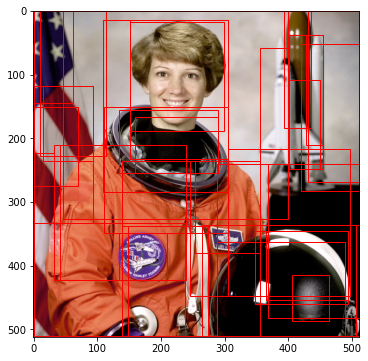

In [36]:
img = skimage.data.astronaut() 
selective_search(img, max_num = 40)